# Grow Homework Assignment

##### Libraries

In [657]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error as MAPE, make_scorer
from sklearn.pipeline import make_pipeline # For setting up pipeline
warnings.filterwarnings("ignore")

#### Loading all the datasets

In [658]:
precipitation = pd.read_csv('/content/drive/MyDrive/gro_homework/gro_homework/Daily Precipitation.csv')
soil_moisture = pd.read_csv('/content/drive/MyDrive/gro_homework/gro_homework/Daily Soil Mositure.csv')
daily_temp = pd.read_csv('/content/drive/MyDrive/gro_homework/gro_homework/Daily Temperature.csv')
eight_day_ndvi = pd.read_csv('/content/drive/MyDrive/gro_homework/gro_homework/Eight Day NDVI.csv')
given_production_quantity = pd.read_csv('/content/drive/MyDrive/gro_homework/gro_homework/Production Quantity.csv')
predicted_production_quantity = pd.read_csv('/content/drive/MyDrive/gro_homework/gro_homework/predicted_production_qty.csv')

#### Data Exploration and Pre-processing


###### With a rough view and description of the data, we can see that the there are no null values nor NaN. This makes the data ready for further exploration

In [659]:
precipitation.head()

,start_date,end_date,precip,region_id
0,2014-01-01T00:00:00.000Z,2014-01-01T00:00:00.000Z,1.392393,93
1,2014-01-02T00:00:00.000Z,2014-01-02T00:00:00.000Z,0.315380,93
2,2014-01-03T00:00:00.000Z,2014-01-03T00:00:00.000Z,2.347846,93
3,2014-01-04T00:00:00.000Z,2014-01-04T00:00:00.000Z,21.466357,93
4,2014-01-05T00:00:00.000Z,2014-01-05T00:00:00.000Z,32.823651,93


In [660]:
precipitation.describe(), precipitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29940 entries, 0 to 29939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  29940 non-null  object 
 1   end_date    29940 non-null  object 
 2   precip      29940 non-null  float64
 3   region_id   29940 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 935.8+ KB


(             precip     region_id
 count  29940.000000  29940.000000
 mean       7.275856     99.000000
 std        9.468009      4.098849
 min        0.000000     93.000000
 25%        1.112265     95.000000
 50%        4.340616     98.500000
 75%       10.086396    103.000000
 max      151.307444    105.000000, None)

In [661]:
soil_moisture.head()

,start_date,end_date,smos,region_id
0,2014-01-01T00:00:00.000Z,2014-01-01T00:00:00.000Z,0.310787,93
1,2014-01-02T00:00:00.000Z,2014-01-02T00:00:00.000Z,0.192271,93
2,2014-01-03T00:00:00.000Z,2014-01-03T00:00:00.000Z,0.265683,93
3,2014-01-04T00:00:00.000Z,2014-01-04T00:00:00.000Z,0.265683,93
4,2014-01-05T00:00:00.000Z,2014-01-05T00:00:00.000Z,0.230782,93


In [662]:
soil_moisture.describe(), soil_moisture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29603 entries, 0 to 29602
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  29603 non-null  object 
 1   end_date    29603 non-null  object 
 2   smos        29603 non-null  float64
 3   region_id   29603 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 925.2+ KB


(               smos     region_id
 count  29603.000000  29603.000000
 mean       0.266492     98.982772
 std        0.092495      4.091924
 min        0.004318     93.000000
 25%        0.203135     95.000000
 50%        0.260049     98.000000
 75%        0.321686    103.000000
 max        0.814535    105.000000, None)

In [663]:
daily_temp.head()

,start_date,end_date,temp,region_id
0,2014-01-02T00:00:00.000Z,2014-01-02T00:00:00.000Z,24.707605,93
1,2014-01-11T00:00:00.000Z,2014-01-11T00:00:00.000Z,26.421176,93
2,2014-01-15T00:00:00.000Z,2014-01-15T00:00:00.000Z,24.305642,93
3,2014-01-20T00:00:00.000Z,2014-01-20T00:00:00.000Z,25.142744,93
4,2014-01-23T00:00:00.000Z,2014-01-23T00:00:00.000Z,23.653173,93


In [664]:
daily_temp.describe(), daily_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12930 entries, 0 to 12929
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  12930 non-null  object 
 1   end_date    12930 non-null  object 
 2   temp        12930 non-null  float64
 3   region_id   12930 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 404.2+ KB


(               temp     region_id
 count  12930.000000  12930.000000
 mean      26.542191     99.167131
 std        2.494511      4.011680
 min       17.031505     93.000000
 25%       24.843353     95.000000
 50%       26.591613     99.000000
 75%       28.185999    103.000000
 max       37.295265    105.000000, None)

In [665]:
eight_day_ndvi.head()

,start_date,end_date,ndvi,region_id
0,2013-12-27T00:00:00.000Z,2014-01-03T00:00:00.000Z,0.679106,93
1,2014-01-01T00:00:00.000Z,2014-01-08T00:00:00.000Z,0.701431,93
2,2014-01-09T00:00:00.000Z,2014-01-16T00:00:00.000Z,0.745149,93
3,2014-01-17T00:00:00.000Z,2014-01-24T00:00:00.000Z,0.747391,93
4,2014-01-25T00:00:00.000Z,2014-02-01T00:00:00.000Z,0.768325,93


In [666]:
eight_day_ndvi.describe(), eight_day_ndvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  3338 non-null   object 
 1   end_date    3338 non-null   object 
 2   ndvi        3338 non-null   float64
 3   region_id   3338 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 104.4+ KB


(              ndvi    region_id
 count  3338.000000  3338.000000
 mean      0.798429    98.993110
 std       0.033146     4.048361
 min       0.573141    93.000000
 25%       0.784141    95.000000
 50%       0.805861    99.000000
 75%       0.821163   103.000000
 max       0.862471   105.000000, None)

In [667]:
predicted_production_quantity.head()

,start_date,end_date,prod,region_id
0,2021-01-01T00:00:00.000Z,2021-01-31T00:00:00.000Z,NaN,93
1,2021-02-01T00:00:00.000Z,2021-02-28T00:00:00.000Z,NaN,93
2,2021-03-01T00:00:00.000Z,2021-03-31T00:00:00.000Z,NaN,93
3,2021-04-01T00:00:00.000Z,2021-04-30T00:00:00.000Z,NaN,93
4,2021-05-01T00:00:00.000Z,2021-05-31T00:00:00.000Z,NaN,93


In [668]:
predicted_production_quantity.info(), predicted_production_quantity.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  120 non-null    object 
 1   end_date    120 non-null    object 
 2   prod        0 non-null      float64
 3   region_id   120 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ KB


(None,        prod   region_id
 count   0.0  120.000000
 mean    NaN   99.000000
 std     NaN    4.115966
 min     NaN   93.000000
 25%     NaN   95.000000
 50%     NaN   98.500000
 75%     NaN  103.000000
 max     NaN  105.000000)

In [669]:
given_production_quantity.head()

,start_date,end_date,prod,region_id
0,2015-01-01T00:00:00.000Z,2015-01-31T00:00:00.000Z,171725,93
1,2015-02-01T00:00:00.000Z,2015-02-28T00:00:00.000Z,188325,93
2,2015-03-01T00:00:00.000Z,2015-03-31T00:00:00.000Z,247856,93
3,2015-04-01T00:00:00.000Z,2015-04-30T00:00:00.000Z,282791,93
4,2015-05-01T00:00:00.000Z,2015-05-31T00:00:00.000Z,291057,93


In [670]:
given_production_quantity.describe()

,prod,region_id
count,720.000000,720.00000
mean,159014.201389,99.00000
std,142882.722751,4.10163
min,10215.000000,93.00000
25%,35445.500000,95.00000
50%,91945.500000,98.50000
75%,269946.000000,103.00000
max,593579.000000,105.00000


##### Converting all the start and end date columns to *datetime* format for easy analysis

In [671]:
data = [precipitation, soil_moisture, daily_temp, eight_day_ndvi, given_production_quantity]
for d in data:
  d.start_date = d.start_date.apply(lambda x: np.datetime64(x))
  d.end_date = d.start_date.apply(lambda x: np.datetime64(x))

In [672]:
daily_temp

,start_date,end_date,temp,region_id
0,2014-01-02,2014-01-02,24.707605,93
1,2014-01-11,2014-01-11,26.421176,93
2,2014-01-15,2014-01-15,24.305642,93
3,2014-01-20,2014-01-20,25.142744,93
4,2014-01-23,2014-01-23,23.653173,93
...,...,...,...,...
12925,2022-03-02,2022-03-02,24.402574,105
12926,2022-03-08,2022-03-08,29.217803,105
12927,2022-03-11,2022-03-11,26.027421,105
12928,2022-03-12,2022-03-12,27.108212,105


##### Checking the earliest start date

In [673]:
given_production_quantity.start_date.min(), precipitation.start_date.max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2022-03-13 00:00:00'))

##### Commented below is a code block to merge and form a dataframe consisting annual mean of all the datasets (soil_moisture, daily_temp, precipitation, and eight_day_ndvi). Since this block takes some time to execute I created a csv file from and will be loading it to directly into my notebook for easy access.

In [674]:
# year_avg = {}
# for x in given_production_quantity.values[:]:
#   for d in data[:-1]:
#     filter = ((d['start_date'] - x[0]).apply(lambda x: int(str(x).split()[0])) >= -365) & \
#               (d['end_date'] <= x[0]) & \
#               (d['region_id'] == x[-1])
#     if d.columns[-2] in year_avg.keys():
#       year_avg[d.columns[-2]].append(d.loc[filter].mean()[0])
#     else:
#       year_avg[d.columns[-2]] = [d.loc[filter].mean()[0]]

In [675]:
# merged_annual_data = pd.merge(given_production_quantity, pd.DataFrame(year_avg), left_index=True, right_index = True)
# merged_annual_data.to_csv('/content/drive/MyDrive/gro_homework/gro_homework/merged_data.csv')
merged_annual_data = pd.read_csv('/content/drive/MyDrive/gro_homework/gro_homework/merged_data.csv', index_col = 0)

On looking at the description of the merged annual data for crop production we can see the region id has to be one hot encoded, also the min and max values have a lot of difference so we can make out that different regions have varying production or in different parts of the year there is different production, but this data can be used to find the correlation matrix as we have already accounted for different conditions throughout the year


In [676]:
merged_annual_data.describe()

,prod,region_id,precip,smos,temp,ndvi
count,720.000000,720.00000,720.000000,720.000000,720.000000,720.000000
mean,159014.201389,99.00000,7.206887,0.256606,26.725342,0.796302
std,142882.722751,4.10163,1.413860,0.053123,1.175309,0.020582
min,10215.000000,93.00000,4.466245,0.118934,24.327345,0.738109
25%,35445.500000,95.00000,6.143368,0.217560,25.755704,0.777107
50%,91945.500000,98.50000,7.138932,0.257621,26.682546,0.800869
75%,269946.000000,103.00000,8.022870,0.301114,27.307282,0.810272
max,593579.000000,105.00000,11.509880,0.366095,29.321100,0.835185


The same has been displayed via the blox plot as below

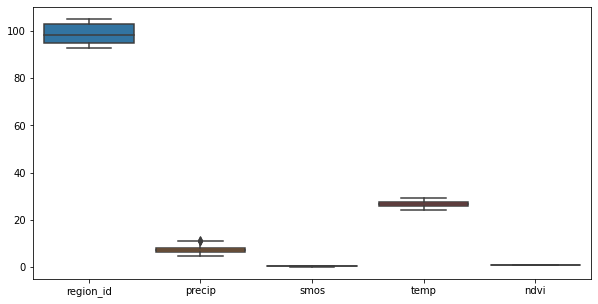

In [677]:
plt.figure(figsize=(10,5))
sns.boxplot(data = merged_annual_data[merged_annual_data.columns[3:]])

In [678]:
corr = merged_annual_data.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,prod,region_id,precip,smos,temp,ndvi
prod,1.00,0.17,0.05,-0.22,-0.41,0.67
region_id,0.17,1.00,0.33,-0.30,-0.25,0.17
precip,0.05,0.33,1.00,0.04,-0.21,0.06
smos,-0.22,-0.30,0.04,1.00,0.54,-0.35
temp,-0.41,-0.25,-0.21,0.54,1.00,-0.16
ndvi,0.67,0.17,0.06,-0.35,-0.16,1.00


By looking at the correlation table, wrt production precipiation and and soil moisture are mostly independed (or have very low correlation) </br> ndvi and temp have a higher positve and negative correlation but will not be filtered out as they are below 0.7 (absolute value) which is generally when we have to consider multicollinearity. </br>

Below I have One hot encoded the region_id as mentioned earlier as only the location and not the assigned *region_id #* affects the final production

In [679]:
merged_annual_data = pd.get_dummies(merged_annual_data, columns = ['region_id'])
merged_annual_data.head()

,start_date,end_date,prod,precip,smos,temp,ndvi,region_id_93,region_id_94,region_id_95,region_id_97,region_id_98,region_id_99,region_id_102,region_id_103,region_id_104,region_id_105
0,2015-01-01,2015-01-01,171725,6.423781,0.285784,26.575009,0.776381,1,0,0,0,0,0,0,0,0,0
1,2015-02-01,2015-02-01,188325,6.574815,0.288382,26.514585,0.779580,1,0,0,0,0,0,0,0,0,0
2,2015-03-01,2015-03-01,247856,6.643400,0.289221,26.496298,0.778856,1,0,0,0,0,0,0,0,0,0
3,2015-04-01,2015-04-01,282791,6.478796,0.289432,26.269947,0.778495,1,0,0,0,0,0,0,0,0,0
4,2015-05-01,2015-05-01,291057,6.435314,0.287268,26.335397,0.777045,1,0,0,0,0,0,0,0,0,0


### Data Prep </br>

Preparing the data for model selection

I'm selecting all the significant features here and hence I've dropped the start and end date as they have been indirectly used to calaculate the merged annual data

In [680]:
features = merged_annual_data.columns[2:]
features

Index(['prod', 'precip', 'smos', 'temp', 'ndvi', 'region_id_93',
       'region_id_94', 'region_id_95', 'region_id_97', 'region_id_98',
       'region_id_99', 'region_id_102', 'region_id_103', 'region_id_104',
       'region_id_105'],
      dtype='object')

Specifying data and target variables using the feature variable described above

In [681]:
target = merged_annual_data.loc[:,features[0]] 
data = merged_annual_data.loc[:,features[1:]]
data.head()

,precip,smos,temp,ndvi,region_id_93,region_id_94,region_id_95,region_id_97,region_id_98,region_id_99,region_id_102,region_id_103,region_id_104,region_id_105
0,6.423781,0.285784,26.575009,0.776381,1,0,0,0,0,0,0,0,0,0
1,6.574815,0.288382,26.514585,0.779580,1,0,0,0,0,0,0,0,0,0
2,6.643400,0.289221,26.496298,0.778856,1,0,0,0,0,0,0,0,0,0
3,6.478796,0.289432,26.269947,0.778495,1,0,0,0,0,0,0,0,0,0
4,6.435314,0.287268,26.335397,0.777045,1,0,0,0,0,0,0,0,0,0


##### From the information below we can see that our preprocessing did not generate any null or NaN values so we're good to go!

In [682]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precip         720 non-null    float64
 1   smos           720 non-null    float64
 2   temp           720 non-null    float64
 3   ndvi           720 non-null    float64
 4   region_id_93   720 non-null    uint8  
 5   region_id_94   720 non-null    uint8  
 6   region_id_95   720 non-null    uint8  
 7   region_id_97   720 non-null    uint8  
 8   region_id_98   720 non-null    uint8  
 9   region_id_99   720 non-null    uint8  
 10  region_id_102  720 non-null    uint8  
 11  region_id_103  720 non-null    uint8  
 12  region_id_104  720 non-null    uint8  
 13  region_id_105  720 non-null    uint8  
dtypes: float64(4), uint8(10)
memory usage: 35.2 KB


In [683]:
target.head()

0    171725
1    188325
2    247856
3    282791
4    291057
Name: prod, dtype: int64

In [684]:
target.describe()

count       720.000000
mean     159014.201389
std      142882.722751
min       10215.000000
25%       35445.500000
50%       91945.500000
75%      269946.000000
max      593579.000000
Name: prod, dtype: float64

In [685]:
# minMax = MinMaxScaler()
# minMax.fit(data)
# data = minMax.fit_transform(data)
# data = pd.DataFrame(data, columns = features[1:])

### Model Selection

In [686]:
train_X, test_X, train_y, test_y = train_test_split(data, target)

In [687]:
# def compare_models(model):
#   model_name = model.__class__.__name__
#   fit = model.fit(train_X, train_y)
#   pred_y = fit.predict(test_X)
#   r2 = r2_score(test_y, pred_y)
#   mape_score = MAPE(test_y,pred_y)
#   return [model_name, mape_score, r2]  

In [688]:
# models = [
#     GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
#      RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
#     svm.SVR(),
#    DecisionTreeRegressor()
# ]
# compare_models = list(map(compare_models, models))
# steps = [('scaler', MinMaxScaler()), ('compare_models', models)]


In [689]:
# print(*compare_models, sep = '\n')

Using Pipelines to prevent any data leakage and perform uniform data preparating step for model selection. I'm using the MinMaxScaler for this since I don't know the distribution of the data for each variable and the MinMaxScaler returns a value between 0 and 1 which is good enough for training the dataset. </br> </br> I've also used crossvalidation with ten fold for actually evaluation each model since I don't actually know if the data is stratified or not and if stratification will actually impact the the final prediction (it doesn't in this case as we see below). I also defined r2_scorer and MAPE as scorers as they were metrics and couldn't actually be used directly as custom evaluators with cross validations

In [690]:
gbr = make_pipeline(MinMaxScaler(), GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=0))
rfr = make_pipeline(MinMaxScaler(), RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0))
svr = make_pipeline(MinMaxScaler(), svm.SVR())
dcr = make_pipeline(MinMaxScaler(), DecisionTreeRegressor())

pipes = [gbr, rfr, svr, dcr]

scoring_type = {'R2': make_scorer(r2_score, greater_is_better=True), 'MAPE': make_scorer(MAPE)}
cv = KFold(n_splits=10, shuffle=True, random_state=0)
scores = {}
for p in pipes:
  scores[f'{p[1].__class__.__name__}'] = cross_validate(p, train_X, train_y, cv = cv, scoring = scoring_type)
  print(p[1].__class__.__name__, end = "\t")
  print('R2 Score:', scores[f'{p[1].__class__.__name__}']['test_R2'].mean(), 'MAPE score:', scores[f'{p[1].__class__.__name__}']['test_MAPE'].mean())

GradientBoostingRegressor	R2 Score: 0.9566251007262732 MAPE score: 0.17036351074476616
RandomForestRegressor	R2 Score: 0.9433537890935672 MAPE score: 0.2870339424607069
SVR	R2 Score: -0.30045463653616233 MAPE score: 1.2884722440161864
DecisionTreeRegressor	R2 Score: 0.9246089777859485 MAPE score: 0.18767107842245115


##### Visualising the scores for each model
- Graph depicting the r2 and mape scores for each model for different k-folds
- The *'o'* marker represent the mean of each score

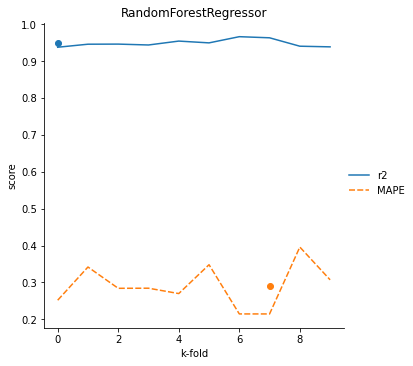

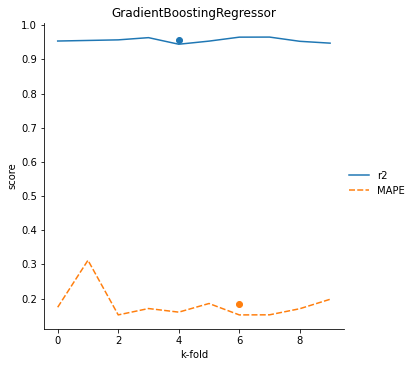

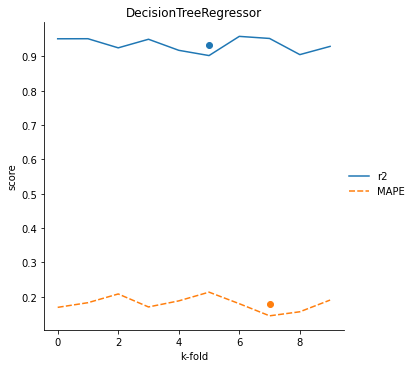

In [691]:
for name in list(set(performance.name))[:3]:
  temp = performance.loc[performance['name'] == name, ['r2', 'MAPE']].reset_index(drop = True).copy()
  sns.relplot(data = temp, kind = 'line').set(title = name, xlabel = 'k-fold', ylabel = 'score')
  
  temp_mean = temp - temp.mean()
  
  mean_r2 = (temp['r2'] - temp['r2'].mean()).min()
  mean_mape = (temp['MAPE'] - temp['MAPE'].mean()).min()
  
  mean_r2 = temp_mean.loc[(temp_mean['r2'] == mean_r2)].index
  mean_mape = temp_mean.loc[(temp_mean['MAPE'] == mean_mape)].index  

  plt.plot(mean_r2.values[0], temp.mean()['r2'],marker = 'o')
  plt.plot(mean_mape.values[0], temp.mean()['MAPE'],marker = 'o')

##### Model Evaluation

In [692]:
r2_ = []
mape = []
name = []
for k in scores:
  r2_.extend(scores[k]['test_R2'])
  mape.extend(scores[k]['test_MAPE'])
  name.extend([k]*len(scores[k]['test_R2']))
performance = pd.DataFrame()
performance['r2'] = r2_  
performance['MAPE'] = mape
performance['name'] = name


performance.groupby(by = 'name').mean().reset_index(drop = False)

,name,r2,MAPE
0,DecisionTreeRegressor,0.924609,0.187671
1,GradientBoostingRegressor,0.956625,0.170364
2,RandomForestRegressor,0.943354,0.287034
3,SVR,-0.300455,1.288472


- Based on the R2 score, GradientBoostingRegressor, RandomForrestRegressor and DecisionTreeRegressor, all have a good performance. 
- On further evaluation using the Mean Absolute Percentage Eror, DecisionTrees and GradientBoostingRegressor have the best scores.

Based on the values obtained from the cross validation, Gradient Booster is the best choice as it is fairly robust to overfitting contrary to Decision trees. 

In [693]:
gbr = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=0)
minMax = MinMaxScaler()
gbr.fit(train_X, train_y)
pred_y = gbr.predict(test_X)
r2_score(test_y, pred_y), MAPE(test_y, pred_y)

(0.9438513875288214, 0.1808584656823541)

The result obtained on the training data is similar to what was obtained during cross validation, hence the results are verified.

### Generating Predictions

Training the model on the entire training data

In [694]:
gbr.fit(data, target)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=0)

Using the same chunk as before to generate an annual dataset for the test data provided in *predicted_production_qty.csv* as well as preparing the preloaded the datasets, since the test dataset is smaller the chunk below doesn't take as much time and hence have been left as a part of the notebook

In [695]:
year_avg_pred = {}

data = [precipitation, soil_moisture, daily_temp, eight_day_ndvi]
for d in data:
  d.start_date = d.start_date.apply(lambda x: np.datetime64(x))
  d.end_date = d.start_date.apply(lambda x: np.datetime64(x))

predicted_production_quantity.start_date = predicted_production_quantity.start_date.apply(lambda x: np.datetime64(x))
predicted_production_quantity.end_date = predicted_production_quantity.end_date.apply(lambda x: np.datetime64(x))

for x in predicted_production_quantity.values[:]:
  for d in data:
    filter = ((d['start_date'] - x[0]).apply(lambda x: int(str(x).split()[0])) >= -365) & \
              (d['end_date'] <= x[0]) & \
              (d['region_id'] == x[-1])
    if d.columns[-2] in year_avg_pred.keys():
      year_avg_pred[d.columns[-2]].append(d.loc[filter].mean()[0])
    else:
      year_avg_pred[d.columns[-2]] = [d.loc[filter].mean()[0]]

In [696]:
predicted_production_quantity.head()

,start_date,end_date,prod,region_id
0,2021-01-01,2021-01-31,NaN,93
1,2021-02-01,2021-02-28,NaN,93
2,2021-03-01,2021-03-31,NaN,93
3,2021-04-01,2021-04-30,NaN,93
4,2021-05-01,2021-05-31,NaN,93


In [697]:
predicted_production_quantity.start_date.max()

Timestamp('2021-12-01 00:00:00')

Formatting test data in the form form of training set by one hot encoding the region_id and merging annual data from the supporting datasets given. Since the max value for precipiation and other fields in 2022 it matches our initial assumption of 1 year and can be used for predicting the yield as the max value for start_date in predicted_production_qty is still *2021-12-01* 

In [698]:
predicted = pd.merge(predicted_production_quantity, pd.DataFrame(year_avg_pred), left_index = True, right_index = True)
predicted = pd.get_dummies(predicted, columns = ['region_id'])
predicted = predicted.loc[:,features]
predicted

,prod,precip,smos,temp,ndvi,region_id_93,region_id_94,region_id_95,region_id_97,region_id_98,region_id_99,region_id_102,region_id_103,region_id_104,region_id_105
0,NaN,6.414807,0.365853,27.926519,0.808008,1,0,0,0,0,0,0,0,0,0
1,NaN,7.335061,0.372013,27.867483,0.808644,1,0,0,0,0,0,0,0,0,0
2,NaN,6.863975,0.374540,27.748138,0.806370,1,0,0,0,0,0,0,0,0,0
3,NaN,7.147358,0.374050,27.581635,0.806110,1,0,0,0,0,0,0,0,0,0
4,NaN,7.137215,0.377475,27.397938,0.808005,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,NaN,8.851298,0.257433,26.517878,0.807106,0,0,0,0,0,0,0,0,0,1
116,NaN,8.899841,0.260643,26.405052,0.807340,0,0,0,0,0,0,0,0,0,1
117,NaN,9.059531,0.258592,26.303724,0.807724,0,0,0,0,0,0,0,0,0,1
118,NaN,8.706095,0.259281,26.319276,0.806386,0,0,0,0,0,0,0,0,0,1


Formatting and generating the final predicted dataset

In [699]:
predicted_production_quantity.loc[:,'prod'] = gbr.predict(predicted.loc[:,features[1:]])

In [700]:
predicted_production_quantity.head()

,start_date,end_date,prod,region_id
0,2021-01-01,2021-01-31,233042.163444,93
1,2021-02-01,2021-02-28,240549.263637,93
2,2021-03-01,2021-03-31,241383.116399,93
3,2021-04-01,2021-04-30,245536.573440,93
4,2021-05-01,2021-05-31,261906.932987,93


In [701]:
predicted_production_quantity.describe()

,prod,region_id
count,120.000000,120.000000
mean,156230.642754,99.000000
std,129155.917982,4.115966
min,11371.751377,93.000000
25%,42243.017677,95.000000
50%,95508.442386,98.500000
75%,258481.212800,103.000000
max,395027.060283,105.000000


In [702]:
predicted_production_quantity.to_csv('/content/drive/MyDrive/gro_homework/gro_homework/predicted_production_qty.csv')

# References



1.   https://gro-intelligence.com/insights/ndvi-the-indispensable-data-to-forecast-crop-yields
2.   https://www.sciencedirect.com/science/article/pii/S1470160X20310633
3. https://www.usgs.gov/special-topics/remote-sensing-phenology/science/ndvi-foundation-remote-sensing-phenologyhttps://www.usgs.gov/special-topics/remote-sensing-phenology/science/ndvi-foundation-remote-sensing-phenology


